In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

#import torch
#from torch import nn
#from torch.utils.data import Dataset, DataLoader




Load data set

In [100]:
df = pd.read_excel(r"C:\Users\mahes\Downloads\seat_matrix_data (2).xlsx")

df

,college_branch,year,category,round,total_seats,filled_seats,available_seats
0,E205 EE,22,STG,2ext,1,0,1
1,E205 EE,22,SCG,2ext,1,0,1
2,E205 CS,22,SCG,2ext,1,0,1
3,E205 EC,22,SCG,2ext,2,0,2
4,E205 CD,22,GMR,2ext,1,0,1
...,...,...,...,...,...,...,...
32248,E165 CS,21,2AG,1gen,3,0,3
32249,E165 EC,21,2AG,1gen,3,0,3
32250,E165 AI,21,1G,1gen,1,0,1
32251,E165 ME,21,1G,1gen,1,0,1


In [101]:
cf=pd.read_excel(r"C:\Users\mahes\Downloads\cutoff_data (2).xlsx")

In [102]:
kcet_data = pd.merge(cf, df, on=['college_branch', 'year', 'category', 'round'], how='left')


Data Insecption

In [103]:
kcet_data.shape

(39846, 8)

In [104]:
kcet_data.head()

,college_branch,category,round,year,rank,total_seats,filled_seats,available_seats
0,E255 CB,STR,2gen,21,101886,NaN,NaN,NaN
1,E177 EE,STR,2gen,21,160055,1.0,0.0,1.0
2,E162 ME,STR,2gen,21,168760,NaN,NaN,NaN
3,E109 EC,STR,2gen,21,119221,NaN,NaN,NaN
4,E095 EE,STR,2gen,21,146318,1.0,0.0,1.0


In [105]:
kcet_data.tail()

,college_branch,category,round,year,rank,total_seats,filled_seats,available_seats
39841,E001 EE,1G,1gen,22,28948,2.0,0.0,2.0
39842,E001 EC,1G,1gen,22,7832,3.0,0.0,3.0
39843,E001 CS,1G,1gen,22,2910,2.0,0.0,2.0
39844,E001 CE,1G,1gen,22,66271,3.0,0.0,3.0
39845,E001 AI,1G,1gen,22,7418,2.0,0.0,2.0


In [106]:
kcet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39846 entries, 0 to 39845
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   college_branch   39846 non-null  object 
 1   category         39846 non-null  object 
 2   round            39846 non-null  object 
 3   year             39846 non-null  int64  
 4   rank             39846 non-null  int64  
 5   total_seats      23053 non-null  float64
 6   filled_seats     23053 non-null  float64
 7   available_seats  23053 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.4+ MB


In [107]:
kcet_data.describe()

,year,rank,total_seats,filled_seats,available_seats
count,39846.000000,39846.000000,23053.000000,23053.0,23053.000000
mean,21.505973,75429.286001,3.431050,0.0,3.431050
std,0.499971,46503.661802,6.486828,0.0,6.486828
min,21.000000,93.000000,1.000000,0.0,1.000000
25%,21.000000,38732.000000,1.000000,0.0,1.000000
50%,22.000000,68148.000000,1.000000,0.0,1.000000
75%,22.000000,105545.750000,3.000000,0.0,3.000000
max,22.000000,183210.000000,117.000000,0.0,117.000000


In [108]:
kcet_data.head()

,college_branch,category,round,year,rank,total_seats,filled_seats,available_seats
0,E255 CB,STR,2gen,21,101886,NaN,NaN,NaN
1,E177 EE,STR,2gen,21,160055,1.0,0.0,1.0
2,E162 ME,STR,2gen,21,168760,NaN,NaN,NaN
3,E109 EC,STR,2gen,21,119221,NaN,NaN,NaN
4,E095 EE,STR,2gen,21,146318,1.0,0.0,1.0


data quality check

In [109]:
kcet_data.isnull().sum().sort_values(ascending=False)


total_seats        16793
filled_seats       16793
available_seats    16793
college_branch         0
category               0
round                  0
year                   0
rank                   0
dtype: int64

In [110]:
kcet_data.duplicated().sum()
#kcet_data.drop_duplicates(inplace=True)

0

<Axes: >

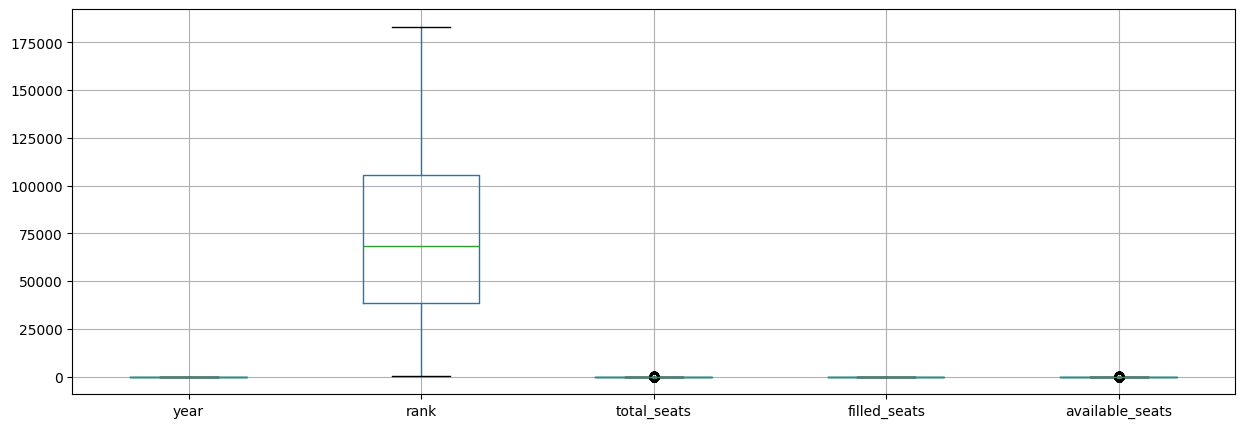

In [111]:
kcet_data.boxplot(figsize=(15,5))


<Axes: >

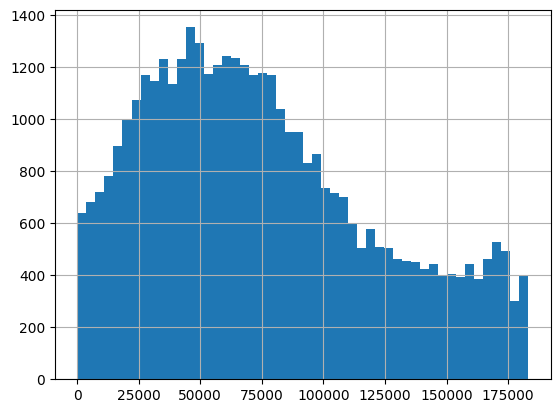

In [112]:

kcet_data['rank'].hist(bins=50)

In [113]:
kcet_data['category'].value_counts(normalize=True)
#kcet_data['branch'].value_counts()
#kcet_data['college_branch'].value_counts() 

category
GM     0.114114
2AG    0.081966
SCG    0.081188
GMR    0.080786
3BG    0.073508
2BG    0.071550
3AG    0.071425
1G     0.068915
GMK    0.060483
STG    0.056292
2AR    0.053631
SCR    0.043191
3BR    0.025122
2AK    0.021433
SCK    0.019927
1R     0.016664
3AR    0.015836
2BR    0.013728
STR    0.010189
3BK    0.007579
1K     0.003790
3AK    0.003539
STK    0.002736
2BK    0.002409
Name: proportion, dtype: float64

In [114]:
kcet_data=kcet_data.fillna(0)


<Axes: >

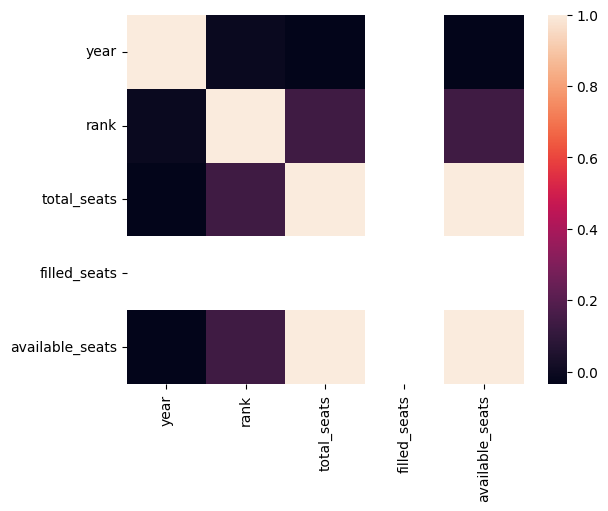

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = kcet_data.corr(numeric_only=True)
sns.heatmap(corr)


<Axes: xlabel='total_seats', ylabel='rank'>

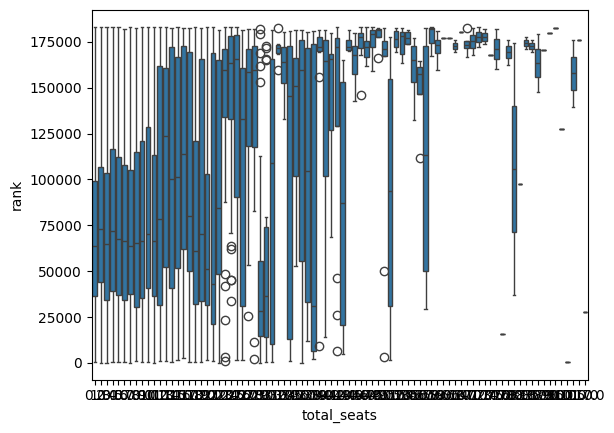

In [116]:
#sns.boxplot(x='year', y='rank', data=kcet_data)
#sns.boxplot(x='category', y='rank', data=kcet_data)
sns.boxplot(x='total_seats', y='rank', data=kcet_data)

<Axes: xlabel='rank', ylabel='year'>

C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


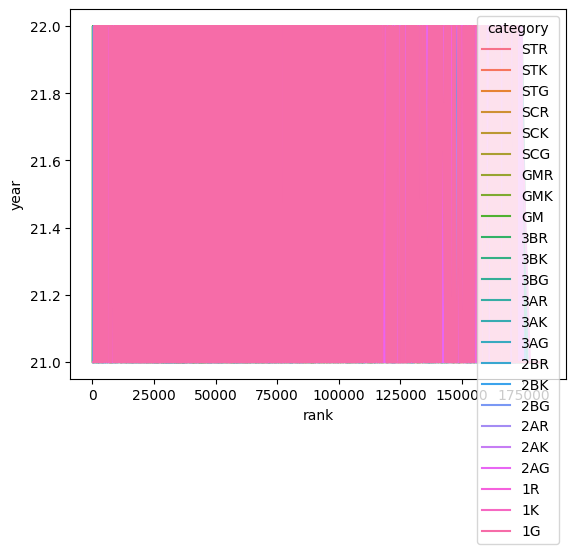

In [117]:
sns.lineplot(x='rank', y='year', hue='category', data=kcet_data)


In [118]:
df=kcet_data
df = df.sort_values(["college_branch","category","year","round"]).reset_index(drop=True)


df.columns


Index(['college_branch', 'category', 'round', 'year', 'rank', 'total_seats',
       'filled_seats', 'available_seats'],
      dtype='object')

In [119]:
df["prev_year_rank"] = df.groupby(["college_branch","category","round"])["rank"].shift(1)
df["rank_gap_year"] = df["rank"] - df["prev_year_rank"]

df["cutoff_trend"] = (
    df.groupby(["college_branch","category","round"])["rank"]
      .pct_change()
)


In [120]:
df['cutoff_trend'].isnull().sum()

24760

In [121]:
df["rank_gap_round"] = df.groupby(["college_branch","category","year"])["rank"].diff()
df["momentum"] = df.groupby(["college_branch","category","year"])["rank"].diff()


In [122]:
df.groupby(["college_branch","category","round"])["year"].nunique().value_counts()


year
2    15086
1     9674
Name: count, dtype: int64

In [123]:
# Previous year cutoff (proxy)
df["prev_year_rank"] = (
    df.groupby(["college_branch", "category", "round"])["rank"].shift(1)
)

# Year-wise rank gap
df["rank_gap_year"] = df["rank"] - df["prev_year_rank"]

# Round-wise rank gap
df["rank_gap_round"] = (
    df.groupby(["college_branch", "category", "year"])["rank"].diff()
)

# Long-term trend
df["trend"] = (
    df.groupby(["college_branch", "category"])["rank"]
      .pct_change()
)

# Short-term momentum
df["momentum"] = (
    df.groupby(["college_branch", "category"])["rank"]
      .diff()
)


In [124]:
# Volatility of cutoff behaviour
df["volatility"] = (
    df.groupby(["college_branch", "category"])["rank"]
      .transform("std")
)

# Shock index (unusual movement)
df["shock_index"] = abs(df["rank_gap_year"]) / (df["volatility"] + 1)


In [125]:
df["seat_pressure"] = df["filled_seats"] / df["total_seats"]
df["demand_index"] = df["filled_seats"] / (df["available_seats"] + 1)


In [126]:
df['seat_pressure'].unique()

array([ 0., nan])

In [127]:
df["market_tightness"] = df["seat_pressure"] * df["demand_index"]
df["competition_balance"] = df["seat_pressure"] / (df["volatility"] + 1)


In [128]:
df = df.fillna(0)


In [129]:
df


,college_branch,category,round,year,rank,total_seats,filled_seats,available_seats,prev_year_rank,rank_gap_year,cutoff_trend,rank_gap_round,momentum,trend,volatility,shock_index,seat_pressure,demand_index,market_tightness,competition_balance
0,E001 AI,1G,1gen,21,7512,2.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.000000,4575.459846,0.00000,0.0,0.0,0.0,0.0
1,E001 AI,1G,2ext,21,19290,2.0,0.0,2.0,0.0,0.0,0.000000,11778.0,11778.0,1.567891,4575.459846,0.00000,0.0,0.0,0.0,0.0
2,E001 AI,1G,2gen,21,7512,1.0,0.0,1.0,0.0,0.0,0.000000,-11778.0,-11778.0,-0.610575,4575.459846,0.00000,0.0,0.0,0.0,0.0
3,E001 AI,1G,1gen,22,7418,2.0,0.0,2.0,7512.0,-94.0,-0.012513,0.0,-94.0,-0.012513,4575.459846,0.02054,0.0,0.0,0.0,0.0
4,E001 AI,1G,2ext,22,10199,0.0,0.0,0.0,19290.0,-9091.0,-0.471280,2781.0,2781.0,0.374899,4575.459846,1.98647,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39841,E288 DS,SCG,2ext,22,172601,3.0,0.0,3.0,0.0,0.0,0.000000,29702.0,29702.0,0.207853,15037.923604,0.00000,0.0,0.0,0.0,0.0
39842,E288 DS,SCG,2gen,22,161844,0.0,0.0,0.0,0.0,0.0,0.000000,-10757.0,-10757.0,-0.062323,15037.923604,0.00000,0.0,0.0,0.0,0.0
39843,E288 DS,STG,1gen,22,87384,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,30745.605447,0.00000,0.0,0.0,0.0,0.0
39844,E288 DS,STG,2ext,22,143987,0.0,0.0,0.0,0.0,0.0,0.000000,56603.0,56603.0,0.647750,30745.605447,0.00000,0.0,0.0,0.0,0.0


In [130]:
kcet_data.columns

Index(['college_branch', 'category', 'round', 'year', 'rank', 'total_seats',
       'filled_seats', 'available_seats'],
      dtype='object')

In [131]:
dff= kcet_data.sort_values(["college_branch", "category", "round", "year"])


In [132]:
dff["prev_year_rank"] = (
    dff
    .groupby(["college_branch", "category", "round"])["rank"]
    .shift(1)
)


In [133]:
dff['prev_year_rank'].info(
    
)

<class 'pandas.core.series.Series'>
Index: 39846 entries, 19684 to 25042
Series name: prev_year_rank
Non-Null Count  Dtype  
--------------  -----  
15086 non-null  float64
dtypes: float64(1)
memory usage: 622.6 KB


In [134]:
dff["rank_gap_year"] = dff["rank"] - dff["prev_year_rank"]


In [135]:

dff["rank_gap_year"].fillna(0, inplace=True)

C:\Users\mahes\AppData\Local\Temp\ipykernel_8232\3423770337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff["rank_gap_year"].fillna(0, inplace=True)


In [136]:
dff.head(20)

,college_branch,category,round,year,rank,total_seats,filled_seats,available_seats,prev_year_rank,rank_gap_year
19684,E001 AI,1G,1gen,21,7512,2.0,0.0,2.0,NaN,0.0
39845,E001 AI,1G,1gen,22,7418,2.0,0.0,2.0,7512.0,-94.0
6185,E001 AI,1G,2ext,21,19290,2.0,0.0,2.0,NaN,0.0
24920,E001 AI,1G,2ext,22,10199,0.0,0.0,0.0,19290.0,-9091.0
1100,E001 AI,1G,2gen,21,7512,1.0,0.0,1.0,NaN,0.0
32022,E001 AI,1G,2gen,22,10199,1.0,0.0,1.0,7512.0,2687.0
19032,E001 AI,2AG,1gen,21,5887,6.0,0.0,6.0,NaN,0.0
39149,E001 AI,2AG,1gen,22,6685,6.0,0.0,6.0,5887.0,798.0
5739,E001 AI,2AG,2ext,21,10208,2.0,0.0,2.0,NaN,0.0
24460,E001 AI,2AG,2ext,22,12204,1.0,0.0,1.0,10208.0,1996.0


In [137]:
dff['rank_gap'] = dff['rank'] - dff['prev_year_rank']


In [138]:
dff["rank_gap"].fillna(0, inplace=True)


C:\Users\mahes\AppData\Local\Temp\ipykernel_8232\2902521885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff["rank_gap"].fillna(0, inplace=True)


In [139]:
ROUND_ORDER = {"1gen": 1, "2gen": 2, "2ext": 3}

def process_seat_matrix(df):
    df = df.copy()

    # Clean columns
    df["round"] = df["round"].astype(str).str.lower().str.strip()
    df["total_seats"] = df["total_seats"].fillna(0).astype(int)

    df["round_order"] = df["round"].map(ROUND_ORDER)
    df = df.sort_values(["year", "college_branch", "category", "round_order"])

    results = []

    for (year, cb, category), group in df.groupby(["year", "college_branch", "category"]):

        # 🔐 Always fetch first round total explicitly
        first_round_row = group[group["round"] == "1gen"]

        if first_round_row.empty:
            # Skip invalid group safely
            continue

        first_round_total = int(first_round_row.iloc[0]["total_seats"])

        for _, row in group.iterrows():
            round_code = row["round"]
            available_now = int(row["total_seats"])

            if round_code == "1gen":
                total = first_round_total
                filled = 0
                available = first_round_total
            else:
                total = first_round_total
                available = available_now
                filled = max(total - available, 0)

            results.append({
                "year": year,
                "college_branch": cb,
                "category": category,
                "round": round_code,
                "intake_capacity": total,
                "seats_filled": filled,
                "seats_available": available
            })

    return pd.DataFrame(results)


In [140]:
kcet_data = process_seat_matrix(kcet_data)

In [141]:
kcet_data = kcet_data[
    kcet_data["intake_capacity"] >=
    (kcet_data["seats_filled"] + kcet_data["seats_available"])
].reset_index(drop=True)


In [142]:
kcet_data = pd.merge(cf, kcet_data, on=['college_branch', 'year', 'category', 'round'], how='left')
kcet_data.head()

,college_branch,category,round,year,rank,intake_capacity,seats_filled,seats_available
0,E255 CB,STR,2gen,21,101886,1.0,1.0,0.0
1,E177 EE,STR,2gen,21,160055,1.0,0.0,1.0
2,E162 ME,STR,2gen,21,168760,0.0,0.0,0.0
3,E109 EC,STR,2gen,21,119221,1.0,1.0,0.0
4,E095 EE,STR,2gen,21,146318,1.0,0.0,1.0


In [143]:
kcet_data = kcet_data.dropna()
kcet_data["round"] = kcet_data["round"].astype(str)
kcet_data["category"] = kcet_data["category"].astype(str)
kcet_data["college_branch"] = kcet_data["college_branch"].astype(str)


In [144]:
kcet_data[["college_code", "branch_code"]] = (
    kcet_data["college_branch"]
    .str.split("_", expand=True)
    .reindex(columns=[0, 1])
)


In [145]:
# Ensure string type
kcet_data["college_branch"] = kcet_data["college_branch"].astype(str)

# Split using SPACE (only once)
split_cols = kcet_data["college_branch"].str.split(" ", n=1, expand=True)

# Assign safely
kcet_data["college_code"] = split_cols[0]
kcet_data["branch_code"] = split_cols[1]

# Handle missing values
kcet_data["college_code"] = kcet_data["college_code"].fillna("UNKNOWN")
kcet_data["branch_code"] = kcet_data["branch_code"].fillna("UNKNOWN")


In [146]:
kcet_data['branch_code']

0        CB
1        EE
2        ME
3        EC
4        EE
         ..
39841    EE
39842    EC
39843    CS
39844    CE
39845    AI
Name: branch_code, Length: 38161, dtype: object

In [147]:
kcet_data

,college_branch,category,round,year,rank,intake_capacity,seats_filled,seats_available,college_code,branch_code
0,E255 CB,STR,2gen,21,101886,1.0,1.0,0.0,E255,CB
1,E177 EE,STR,2gen,21,160055,1.0,0.0,1.0,E177,EE
2,E162 ME,STR,2gen,21,168760,0.0,0.0,0.0,E162,ME
3,E109 EC,STR,2gen,21,119221,1.0,1.0,0.0,E109,EC
4,E095 EE,STR,2gen,21,146318,1.0,0.0,1.0,E095,EE
...,...,...,...,...,...,...,...,...,...,...
39841,E001 EE,1G,1gen,22,28948,2.0,0.0,2.0,E001,EE
39842,E001 EC,1G,1gen,22,7832,3.0,0.0,3.0,E001,EC
39843,E001 CS,1G,1gen,22,2910,2.0,0.0,2.0,E001,CS
39844,E001 CE,1G,1gen,22,66271,3.0,0.0,3.0,E001,CE


In [148]:
from sklearn.preprocessing import LabelEncoder

le_cc = LabelEncoder()
le_cat = LabelEncoder()
le_round = LabelEncoder()
le_branch= LabelEncoder()

kcet_data["college_code_enc"] = le_cc.fit_transform(kcet_data["college_code"])
kcet_data['branch_code_enc'] = le_branch.fit_transform(kcet_data["branch_code"])
kcet_data["category_enc"] = le_cat.fit_transform(kcet_data["category"])
kcet_data["round_enc"] = le_round.fit_transform(kcet_data["round"])


In [149]:
features = [
    "college_code_enc", "branch_code_enc", "category_enc", "round_enc",
    "year", "intake_capacity", "seats_filled", "seats_available"
]

X = kcet_data[features]
y = kcet_data["rank"]


In [150]:
kcet_data["fill_ratio"] = kcet_data["seats_filled"] / (kcet_data["intake_capacity"] + 1)
kcet_data["availability_ratio"] = kcet_data["seats_available"] / (kcet_data["intake_capacity"] + 1)
kcet_data["demand_pressure"] = kcet_data["seats_filled"] / (kcet_data["seats_available"] + 1)   

In [151]:
import numpy as np
kcet_data["rank_log"] = np.log1p(kcet_data["rank"])

In [152]:
import numpy as np

df2 = kcet_data.copy()

# Seat dynamics
df2["fill_ratio"] = df2["seats_filled"] / (df2["intake_capacity"] + 1)
df2["availability_ratio"] = df2["seats_available"] / (df2["intake_capacity"] + 1)
df2["demand_pressure"] = df2["seats_filled"] / (df2["seats_available"] + 1)

# Trend features
df2["year_norm"] = df2["year"] - df2["year"].min()

# Stability features
df2["seat_pressure_index"] = df2["fill_ratio"] * df2["demand_pressure"]


In [153]:
df2 = pd.get_dummies(df2, columns=["college_code", "branch_code", "category", "round"], drop_first=True)


In [157]:
df2.drop(columns=['college_branch'], inplace=True)

In [158]:
X = df2.drop(columns=["rank"])
y = np.log1p(df2["rank"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(
    max_depth=12,
    learning_rate=0.05,
 
)

model.fit(X_train, y_train)


HistGradientBoostingRegressor(learning_rate=0.05, max_depth=12)

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error

pred_log = model.predict(X_test)
pred = np.expm1(pred_log)

print("R2:", r2_score(np.expm1(y_test), pred))
print("MAE:", mean_absolute_error(np.expm1(y_test), pred))


R2: 0.9998740330884992
MAE: 321.4693329098012


In [162]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("CV R2 Scores:", cv_scores)
print("CV Mean R2:", cv_scores.mean())



CV R2 Scores: [0.99933071 0.99666822 0.99923852 0.99907461 0.99883508]
CV Mean R2: 0.9986294277171763


In [163]:
features = [
    "college_code_enc", "branch_code_enc", "category_enc", "round_enc",
    "year", "intake_capacity", "seats_filled", "seats_available",
    "fill_ratio", "availability_ratio", "demand_pressure"
]

X = kcet_data[features]
y = kcet_data["rank_log"]


In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=22,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)


In [166]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, min_samples_leaf=2, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [167]:
from sklearn.metrics import r2_score, mean_absolute_error

preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))


R2 Score: 0.9018279458936402
MAE: 0.20330349542555767


In [168]:

import numpy as np

sample = X.iloc[[0]]

predicted_log = model.predict(sample)
predicted_rank = np.expm1(predicted_log)

predicted_rank



array([102397.88027644])

In [173]:
actual_rank = kcet_data.iloc[9]["rank"]
print("Actual Rank:", actual_rank)
print("Predicted Rank:", int(predicted_rank[0]))


Actual Rank: 97635
Predicted Rank: 102397
